# A/B Testing of Fast Food Marketing Campaign

The dataset utilized in our analysis is sourced from [Kaggle](https://www.kaggle.com/datasets/chebotinaa/fast-food-marketing-campaign-ab-test/data). This dataset includes sales data collected from a fast-food chain's initiative to introduce a new menu item in various locations. The aim of the experiment is to evaluate the effectiveness of three distinct marketing campaigns in promoting the new product. 

The scenario behind this data is that a fast-food chain is planning to enhance its menu by introducing a new item to attract customers and increase sales. However, the challenge lies in selecting the most effective marketing campaign to promote this new addition. The chain is considering three different marketing strategies and must decide which one will have the most significant impact on sales.

To make this decision, an empirical strategy is implemented in each of the three marketing campaigns in different locations within several randomly selected markets. This approach will enable the collection of weekly sales data for the new item during the initial four weeks of its launch. This data-driven approach will help to determine which marketing campaign is the most successful in driving sales.





# Dataset

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv('WA_Marketing-Campaign.csv')

In [3]:
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [5]:
df.nunique()

MarketID             10
MarketSize            3
LocationID          137
AgeOfStore           25
Promotion             3
week                  4
SalesInThousands    517
dtype: int64


**Key Features of the Dataset:**

- `MarketID`: An identifier for each of the 10 distinct markets where the new menu item was introduced.Each market represents a different geographical area or demographic segment.

- `MarketSize`: The size of the market (e.g., Small, Medium, Large), providing context on the potential customer base and sales volume.
- `LocationID`: A unique identifier for each location within the markets, ensuring the granularity of data collection. The dataset includes sales data from 137 unique store locations.
- `AgeOfStore`: The number of years the store has been operational, offering insights into its established presence and potential customer loyalty.
- `Promotion`: Indicates the type of marketing campaign used at each location (1, 2, or 3), serving as the key variable for comparing the effectiveness of promotional strategies.
- `Week`: The week number (1 through 4) post-launch of the new item, tracking the temporal dynamics of sales performance.
- `SalesInThousands`: The weekly sales of the new menu item, recorded in thousands of dollars, acting as the primary outcome measure to assess the impact of each marketing campaign.

## Distribution of Promotion

To ensure a fair comparison between groups, it is important that promotions are distributed evenly across categories. This is because the ability to detect a true effect (if one exists) can depend on the sizes of the groups being compared. 

In [6]:
grouped_df = df.groupby(['MarketSize','MarketID','Promotion']).size().reset_index(name='Count')

In [7]:
promotion_counts_df = grouped_df.groupby('Promotion')['Count'].sum().reset_index()
promotion_counts_df['Percentage (%)'] = (promotion_counts_df['Count'] / promotion_counts_df['Count'].sum()) * 100

promotion_counts_df

,Promotion,Count,Percentage (%)
0,1,172,31.386861
1,2,188,34.306569
2,3,188,34.306569


## The distribution of 'MarketSize' across different 'Promotion' groups

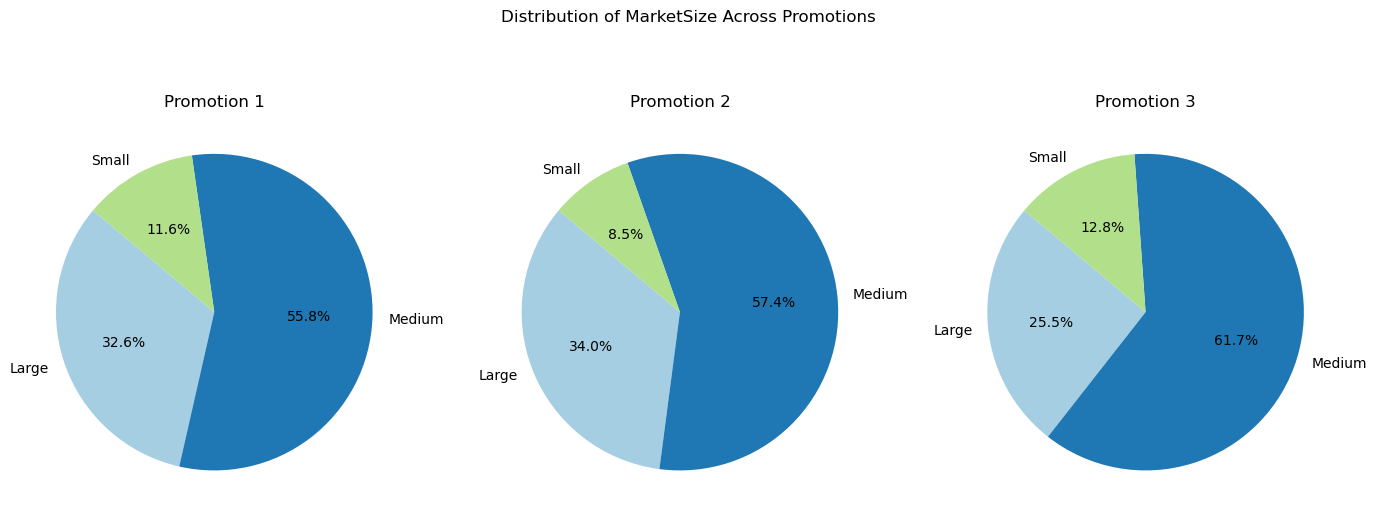

In [13]:
promotions = grouped_df['Promotion'].unique()
market_sizes = grouped_df['MarketSize'].unique()

fig, axes = plt.subplots(1, len(promotions), figsize=(14, 6))

for i, promotion in enumerate(promotions):
    data = grouped_df[grouped_df['Promotion'] == promotion]
    sizes = data.groupby('MarketSize')['Count'].sum()
    axes[i].pie(sizes, labels=sizes.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired", n_colors=len(market_sizes)))
    axes[i].set_title(f'Promotion {promotion}')

plt.suptitle('Distribution of MarketSize Across Promotions')
plt.tight_layout()
plt.show()

In [16]:
contingency_table = pd.crosstab(grouped_df['MarketSize'], grouped_df['Promotion'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value


(0.34370370370370373, 0.9868210381787804)

The high p-value suggests that there is no significant difference in the distribution of 'MarketSize' across different 'Promotion' groups, indicating that the promotions were applied fairly across different market sizes with respect to the dataset provided.

However, the distribution of 'MarketSize' within each promotion significantly deviates from a uniform distribution.
Since the proportion of small market size is much lower than the other market size, it might have implications for how to interpret the results of  A/B test, particularly regarding the representativeness and fairness of each promotion towards different market sizes.

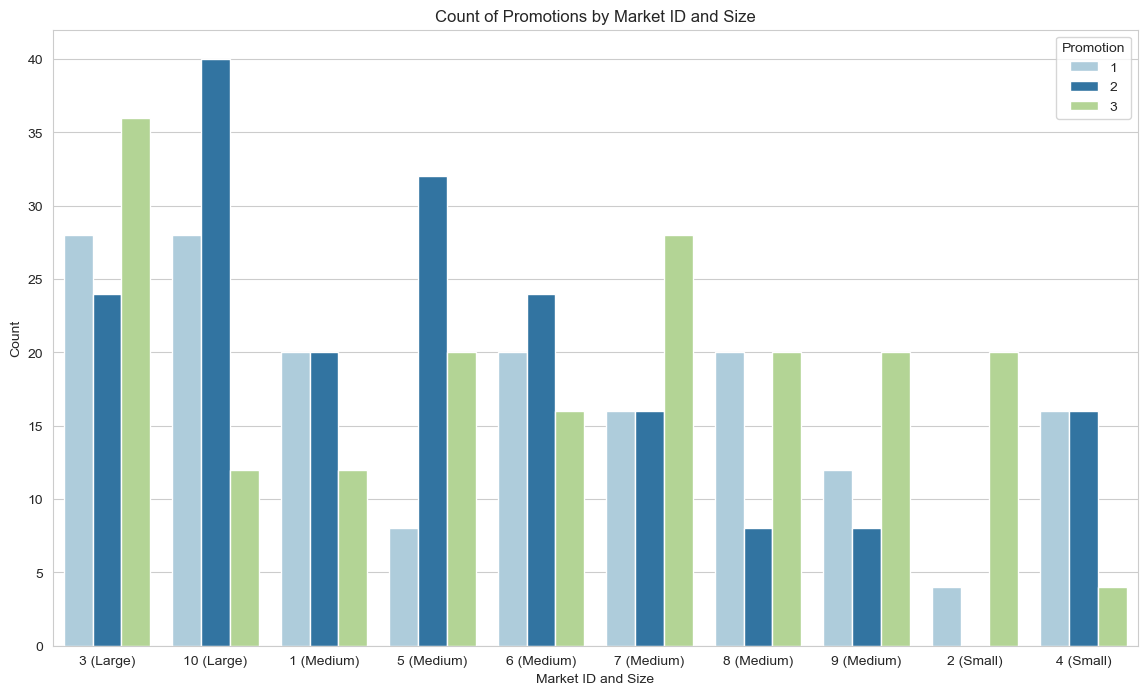

In [19]:
grouped_df['MarketID_Size'] = grouped_df['MarketID'].astype(str) + ' (' + grouped_df['MarketSize'] + ')'

sns.set_style("whitegrid")

plt.figure(figsize=(14, 8))
sns.barplot(x='MarketID_Size', y='Count', hue='Promotion', data=grouped_df, palette='Paired')
plt.xticks()
plt.xlabel('Market ID and Size')
plt.ylabel('Count')
plt.title('Count of Promotions by Market ID and Size')
plt.legend(title='Promotion')
plt.show()


## Impact of Market Size on Sales

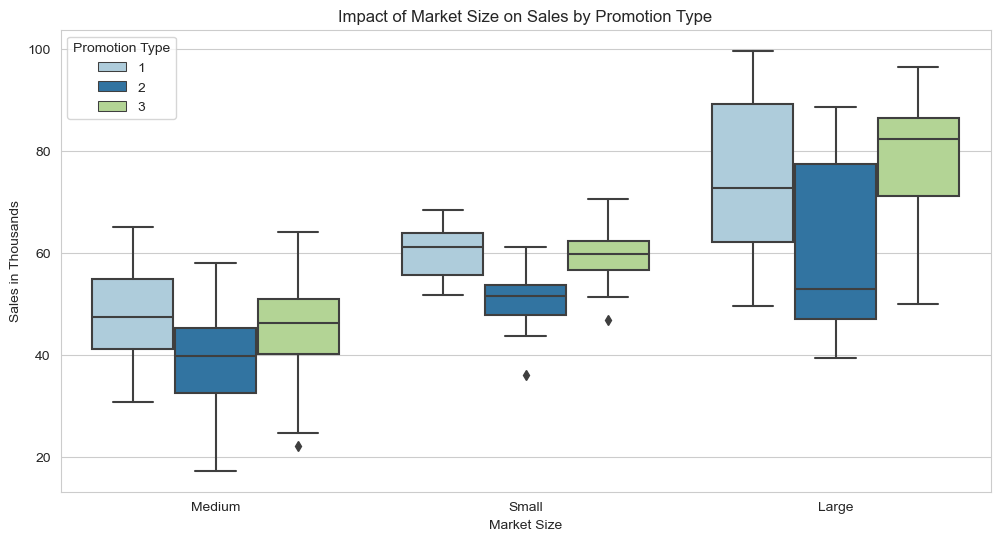

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MarketSize', y='SalesInThousands', hue='Promotion', data=df, palette='Paired')
plt.title('Impact of Market Size on Sales by Promotion Type')
plt.xlabel('Market Size')
plt.ylabel('Sales in Thousands')
plt.legend(title='Promotion Type')
plt.show()

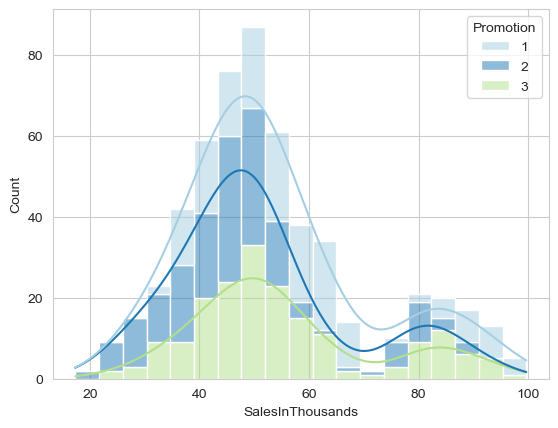

In [33]:
sns.histplot(data=df, x='SalesInThousands', hue='Promotion', multiple='stack', kde=True, palette='Paired')
plt.show(block=True)

The impact of market size on sales performance varies by promotion type. For all market sizes, promotion 1 and 3 generally achieve higher sales than promotion 2. The difference in sales across promotions seems to be more pronounced in larger markets. Promotion 1 generally leads to higher sales, with both a higher mean and a wider range of sales values, indicating more variability in its performance. Promotion 2 has the lowest average sales and shows less variability than the other two promotions. Promotion 3 has performance metrics close to Promotion 1, with slightly lower mean sales but similar variability.

# Conducting the A/B Test

**Defining the Hypotheses:**
- Null Hypothesis ($H_0$): There is no difference in sales performance between the promotion types.
- Alternative Hypothesis ($H_1$): There is a significant difference in sales performance between the promotion types.

**Selecting the Metric:**
In this case, the metric of interest is "SalesInThousands."

**Statistical Testing:**
Perform statistical tests to compare the sales performance of different promotion types. A common approach would be to use ANOVA (Analysis of Variance) if comparing more than two groups, or t-tests if comparing just two groups.

In [31]:
sales_promo1 = df[df['Promotion'] == 1]['SalesInThousands']
sales_promo2 = df[df['Promotion'] == 2]['SalesInThousands']
sales_promo3 = df[df['Promotion'] == 3]['SalesInThousands']


anova_result = f_oneway(sales_promo1, sales_promo2, sales_promo3)

anova_result.pvalue

6.765849261408714e-10

The ANOVA test resulted in a p-value of approximately $6.77\times 10^{-10}$, which is far below the common significance level of 0.05. This suggests that there is a statistically significant difference in sales performance between the different promotion types in your dataset.

With this result, we can reject the null hypothesis that there is no difference in sales performance across the promotion types. This indicates that the type of promotion has a significant effect on sales.

To further understand which promotion types differ from each other, perform post-hoc tests, Tukey's HSD to compare the means of sales between each pair of promotions.

In [36]:
tukey_result = pairwise_tukeyhsd(endog=df['SalesInThousands'], groups=df['Promotion'], alpha=0.05)

tukey_result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-10.7696,0.0,-14.7738,-6.7654,True
1,3,-2.7345,0.2444,-6.7388,1.2697,False
2,3,8.0351,0.0,4.1208,11.9493,True


- The mean difference between group 1 and group 2 is -10.7696. The adjusted p-value (p-adj) for this comparison is 0.0, which is less than the significance level of 0.05. Therefore, we reject the null hypothesis and conclude that there is a significant difference between the means of group 1 and group 2.
- The mean difference between group 1 and group 3 is -2.7345. The adjusted p-value for this comparison is 0.2444, which is greater than 0.05. Therefore, we fail to reject the null hypothesis and conclude that there is no significant difference between the means of group 1 and group 3.
- The mean difference between group 2 and group 3 is 8.0351. The adjusted p-value for this comparison is 0.0, which is less than 0.05. Therefore, we reject the null hypothesis and conclude that there is a significant difference between the means of group 2 and group 3.